In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import acquire

In [2]:
df=acquire.get_bexar20_data()

In [3]:
df.head()

,racecode,candidatecode,precincts,totals,election_day,absentee,early_voting,candidate_party,district_code,race_name,candidate_name,precinct,district
0,0001,001,1001,000795,000000,000000,000000,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1001,
1,0001,001,1002,000686,000000,000000,000000,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1002,
2,0001,001,1003,002267,000000,000000,000000,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1003,
3,0001,001,1004,001003,000000,000000,000000,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1004,
4,0001,001,1005,000859,000000,000000,000000,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1005,


In [4]:
df.shape

(91356, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91356 entries, 0 to 91355
Data columns (total 13 columns):
racecode           91356 non-null object
candidatecode      91356 non-null object
precincts          91356 non-null object
totals             91356 non-null object
election_day       91356 non-null object
absentee           91356 non-null object
early_voting       91356 non-null object
candidate_party    91356 non-null object
district_code      91356 non-null object
race_name          91356 non-null object
candidate_name     91356 non-null object
precinct           91356 non-null object
district           91356 non-null object
dtypes: object(13)
memory usage: 9.1+ MB


In [6]:
df['totals'] = pd.to_numeric(df['totals'])
df['absentee'] = pd.to_numeric(df['absentee'])
df['early_voting']=pd.to_numeric(df['early_voting'])
df['election_day']=pd.to_numeric(df['election_day'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91356 entries, 0 to 91355
Data columns (total 13 columns):
racecode           91356 non-null object
candidatecode      91356 non-null object
precincts          91356 non-null object
totals             91355 non-null float64
election_day       91355 non-null float64
absentee           91355 non-null float64
early_voting       91355 non-null float64
candidate_party    91356 non-null object
district_code      91356 non-null object
race_name          91356 non-null object
candidate_name     91356 non-null object
precinct           91356 non-null object
district           91356 non-null object
dtypes: float64(4), object(9)
memory usage: 9.1+ MB


In [8]:
num_cols=df.columns[[df[col].dtype == 'float64' for col in df.columns]]

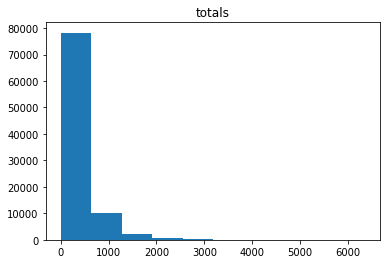

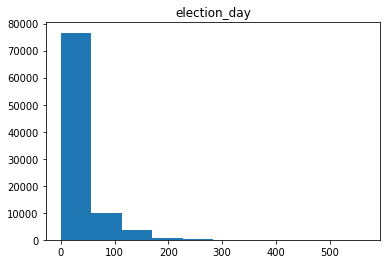

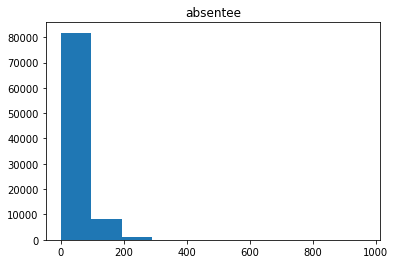

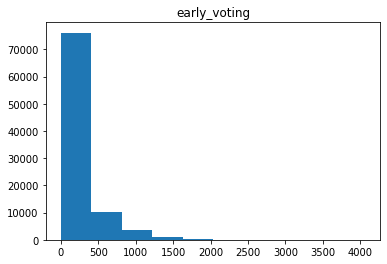

In [9]:
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [10]:
# describe object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))

0004    5362
0005    5355
0011    4560
0012    3800
0014    3800
0015    3800
0037    3670
0018    3040
0016    3040
0017    3040
0013    3040
0032    2936
0036    2936
0038    2936
0033    2936
0031    2936
0035    2936
0034    2936
0118    2228
0116    2228
0117    2228
0019    1435
0022    1320
0006    1290
0020    1160
0010     876
0043     852
0040     840
0007     774
0003     766
        ... 
0098      20
0074      20
0099      20
0076      20
0088      20
0069      20
0084      20
0083      20
0082      20
0085      20
0072      20
0092      20
0075      20
0054      16
0021      16
0056      15
0055      12
0062      12
0110      12
0063      12
0058      12
0108      10
0109       8
0107       8
0105       8
0106       6
0104       4
0102       4
0103       4
}          1
Name: racecode, Length: 121, dtype: int64
0004    0.058693
0005    0.058617
0011    0.049915
0012    0.041596
0014    0.041596
0015    0.041596
0037    0.040173
0018    0.033276
0016    0.033276
0017    0.03

In [11]:
df.isnull().sum()

racecode           0
candidatecode      0
precincts          0
totals             1
election_day       1
absentee           1
early_voting       1
candidate_party    0
district_code      0
race_name          0
candidate_name     0
precinct           0
district           0
dtype: int64

In [12]:
df[df.isnull().any(axis=1)]

,racecode,candidatecode,precincts,totals,election_day,absentee,early_voting,candidate_party,district_code,race_name,candidate_name,precinct,district
91355,},,,NaN,NaN,NaN,NaN,,,,,,


In [13]:
df.drop(df[df.isnull().any(axis=1)].index[0:],inplace=True)

In [14]:
df.isnull().sum()

racecode           0
candidatecode      0
precincts          0
totals             0
election_day       0
absentee           0
early_voting       0
candidate_party    0
district_code      0
race_name          0
candidate_name     0
precinct           0
district           0
dtype: int64

In [15]:
df.drop(columns=['precincts'],inplace=True)

In [16]:
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]

In [17]:
df.head()

,racecode,candidatecode,totals,election_day,absentee,early_voting,candidate_party,district_code,race_name,candidate_name,precinct,district
0,0001,001,795.0,0.0,0.0,0.0,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1001,
1,0001,001,686.0,0.0,0.0,0.0,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1002,
2,0001,001,2267.0,0.0,0.0,0.0,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1003,
3,0001,001,1003.0,0.0,0.0,0.0,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1004,
4,0001,001,859.0,0.0,0.0,0.0,,,REGISTERED VOTERS - TOTAL ...,REGISTERED VOTERS - TOTAL,1005,


In [18]:
df['race_name'].value_counts()

President and Vice President                                5362
United States Senator                                       5355
Railroad Commissioner                                       4560
Justice, Supreme Court, Place 7                             3800
Justice, Supreme Court, Place 8                             3800
Chief Justice, Supreme Court                                3800
Sheriff                                                     3670
Judge, Court of Criminal Appeals, Place 4                   3040
Judge, Court of Criminal Appeals, Place 9                   3040
Justice, Supreme Court, Place 6 (Unexpired Term)            3040
Judge, Court of Criminal Appeals, Place 3                   3040
Chief Justice, 4th Court of Appeals District                2936
District Judge, 37th Judicial District                      2936
District Judge, 144th Judicial District (Unexpired Term)    2936
District Judge, 399th Judicial District                     2936
County Tax Assessor-Colle

In [19]:
df['candidate_name'].value_counts()

OVER VOTES                                19368
UNDER VOTES                               19368
Write-in                                   2265
AGAINST                                    1999
FOR                                        1999
Jo Jorgensen /Jeremy "Spike" Cohen          766
Donald J. Trump /Michael R. Pence           766
BALLOTS CAST - BLANK                        766
Joseph R. Biden /Kamala D. Harris           766
BALLOTS CAST - TOTAL                        766
Howie Hawkins /Angela Walker                766
Kerry Douglas McKennon                      765
David B. Collins                            765
John Cornyn                                 765
Mary "MJ" Hegar                             765
Katija "Kat" Gruene                         760
Tom Oxford                                  760
Amy Clark Meachum                           760
Staci Williams                              760
Jeff Boyd                                   760
Kathy Cheng                             

In [20]:
df['precinct'].nunique()

767

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91355 entries, 0 to 91354
Data columns (total 12 columns):
racecode           91355 non-null object
candidatecode      91355 non-null object
totals             91355 non-null float64
election_day       91355 non-null float64
absentee           91355 non-null float64
early_voting       91355 non-null float64
candidate_party    91355 non-null object
district_code      91355 non-null object
race_name          91355 non-null object
candidate_name     91355 non-null object
precinct           91355 non-null object
district           91355 non-null object
dtypes: float64(4), object(8)
memory usage: 9.1+ MB


In [22]:
fruits_df=pd.DataFrame({'fruits':['strawberry','strawberry','banana','banana','stawberry']})

In [23]:
fruits_df[fruits_df['fruits']=='strawberry']

,fruits
0,strawberry
1,strawberry


In [24]:
df[obj_cols] = df[obj_cols].apply(lambda x: x.str.strip())

In [25]:
df[obj_cols] = df[obj_cols].apply(lambda x: x.str.lower())

In [26]:
df['candidate_name'].value_counts()

under votes                           19368
over votes                            19368
write-in                               2265
for                                    2155
against                                2155
ballots cast - blank                    766
ballots cast - total                    766
donald j. trump /michael r. pence       766
jo jorgensen /jeremy "spike" cohen      766
joseph r. biden /kamala d. harris       766
howie hawkins /angela walker            766
kerry douglas mckennon                  765
john cornyn                             765
mary "mj" hegar                         765
david b. collins                        765
james "jim" wright                      760
katija "kat" gruene                     760
gisela d. triana                        760
matt sterett                            760
tom oxford                              760
amy clark meachum                       760
mark ash                                760
david newell                    

In [27]:
df[df['candidate_name']=='donald j. trump /michael r. pence'].totals.sum()

308618.0

In [28]:
trump_df=df[df['candidate_name']=='donald j. trump /michael r. pence']

In [29]:
trump_df[['precinct','totals']].sort_values(by=['totals'])

,precinct,totals
3004,6026,0.0
2899,4140,0.0
2727,3178,0.0
2726,3177,0.0
2720,3171,0.0
2719,3170,0.0
2682,3133,0.0
2660,3111,0.0
2934,4175,0.0
2937,4178,0.0


In [30]:
biden_df=df[df['candidate_name']=='joseph r. biden /kamala d. harris']

In [31]:
biden_df.totals.sum()

448452.0

In [32]:
biden_df[['precinct','totals']].sort_values(by=['totals'])

,precinct,totals
3770,6026,0.0
3501,3186,0.0
3700,4175,0.0
3705,4180,0.0
3706,4181,0.0
3707,4182,0.0
3494,3179,0.0
3493,3178,0.0
3710,4185,0.0
3492,3177,0.0


In [33]:
biden_df.rename(columns={'totals':'biden_total'},inplace=True)

In [34]:
trump_df.rename(columns={'totals':'trump_total'},inplace=True)

In [35]:
pres_df = pd.merge(biden_df[['precinct','biden_total']],trump_df[['precinct','trump_total']], on='precinct')

In [36]:
pres_df.head()

,precinct,biden_total,trump_total
0,1001,420.0,107.0
1,1002,307.0,157.0
2,1003,1102.0,268.0
3,1004,394.0,117.0
4,1005,342.0,100.0


In [37]:
pres_df.biden_total.sum(),pres_df.trump_total.sum()

(448452.0, 308618.0)

In [38]:
pres_df['total']= pres_df['biden_total'] + pres_df['trump_total']

In [39]:
pres_df.head()

,precinct,biden_total,trump_total,total
0,1001,420.0,107.0,527.0
1,1002,307.0,157.0,464.0
2,1003,1102.0,268.0,1370.0
3,1004,394.0,117.0,511.0
4,1005,342.0,100.0,442.0


In [40]:
pres_df['trump_percent']=(pres_df['trump_total']/pres_df['total'])*100
pres_df['biden_percent']=(pres_df['biden_total']/pres_df['total'])*100

In [41]:
pres_df.head()

,precinct,biden_total,trump_total,total,trump_percent,biden_percent
0,1001,420.0,107.0,527.0,20.303605,79.696395
1,1002,307.0,157.0,464.0,33.836207,66.163793
2,1003,1102.0,268.0,1370.0,19.562044,80.437956
3,1004,394.0,117.0,511.0,22.896282,77.103718
4,1005,342.0,100.0,442.0,22.624434,77.375566


In [42]:
pres_df[['precinct','biden_percent','biden_total','trump_total']].dropna().sort_values(by=['biden_percent'],ascending=False)

,precinct,biden_percent,biden_total,trump_total
747,6008,100.000000,1.0,0.0
762,6023,100.000000,1.0,0.0
305,2155,100.000000,1.0,0.0
711,4191,100.000000,1.0,0.0
131,1132,100.000000,2.0,0.0
517,3207,100.000000,3.0,0.0
259,2109,100.000000,1.0,0.0
698,4178,100.000000,2.0,0.0
750,6011,100.000000,1.0,0.0
268,2118,92.857143,13.0,1.0


In [43]:
pres_df.to_csv('pres_df.csv', index=False)

In [44]:
pres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 0 to 765
Data columns (total 6 columns):
precinct         766 non-null object
biden_total      766 non-null float64
trump_total      766 non-null float64
total            766 non-null float64
trump_percent    706 non-null float64
biden_percent    706 non-null float64
dtypes: float64(5), object(1)
memory usage: 41.9+ KB


In [45]:
pres_df.to_excel('pres_df.xls', index=False)